<a href="https://colab.research.google.com/github/RunheZH/3253-ML-project/blob/main/ECLog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ECLog Data Pre-processing**

In [ ]:
import datetime
from datetime import datetime
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
plt.style.use('fast')
fig = plt.gcf()
fig.set_size_inches(30, 5, forward=True)

<Figure size 2160x360 with 0 Axes>

In [ ]:
# Load file from Google drive
from google.colab import drive
drive.mount('/content/drive')

now = datetime.now()
print('Current DateTime:', now)

df = pd.read_csv('/content/drive/MyDrive/3253-Machine-Learning/Project/eclog.csv')

now = datetime.now()
print('Current DateTime:', now)

Mounted at /content/drive
Current DateTime: 2022-11-25 00:53:53.142546
Current DateTime: 2022-11-25 00:55:35.760943


In [ ]:
df.head()

,IpId,UserId,TimeStamp,HttpMethod,Uri,HttpVersion,ResponseCode,Bytes,Referrer,UserAgent
0,1PL,-,637107516000000000,GET,/p-9710.html,HTTP/1.1,200,14226,https://shop.our-internet-company.pl/p-3880.ht...,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...
1,1PL,-,637107516000000000,GET,/szablony/shop_11.rwd/css/style.php?ncss=style...,HTTP/1.1,200,19214,https://shop.our-internet-company.pl/p-9710.html,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...
2,1PL,-,637107516000000000,GET,/javascript/skrypty.php,HTTP/1.1,200,29403,https://shop.our-internet-company.pl/p-9710.html,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...
3,1PL,-,637107516000000000,GET,/javascript/produkt.php,HTTP/1.1,200,7914,https://shop.our-internet-company.pl/p-9710.html,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...
4,1PL,-,637107516010000000,GET,/szablony/shop_11.rwd/obrazki/szablon/info.png,HTTP/1.1,200,464,https://shop.our-internet-company.pl/szablony/...,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...


In [ ]:
# Format the timestamps
df['TimeStamp2'] = (df['TimeStamp']/(10e6) - 62135769600).apply(datetime.fromtimestamp)

# Group the logs by hours and get the unique number of values for each column
df2 = df.groupby(pd.Grouper(key="TimeStamp2", freq="1H")).nunique()

# Count the total number of logs within each hour.
df2["count"] = df.groupby(pd.Grouper(key="TimeStamp2", freq="1H")).count()["TimeStamp"]

# Rename the columns
df2 = df2.reset_index() 
df2 = df2.rename(columns={'TimeStamp': 'uTimeStamp'})
df2 = df2.rename(columns={'IpId': 'uIps'})
df2 = df2.rename(columns={'UserId': 'uUserIds'})
df2 = df2.rename(columns={'HttpMethod': 'uHttpMethods'})
df2 = df2.rename(columns={'Uri': 'uUris'})
df2 = df2.rename(columns={'HttpVersion': 'uHttpVersions'})
df2 = df2.rename(columns={'ResponseCode': 'uResponseCodes'})
df2 = df2.rename(columns={'Bytes': 'uBytes'})
df2 = df2.rename(columns={'Referrer': 'uReferrers'})
df2 = df2.rename(columns={'UserAgent': 'uUserAgents'})
df2 = df2.rename(columns={'TimeStamp2': 'TimeStamp'})
df2.head()

,TimeStamp,uIps,uUserIds,uTimeStamp,uHttpMethods,uUris,uHttpVersions,uResponseCodes,uBytes,uReferrers,uUserAgents,count
0,2019-11-28 23:00:00,187,1,2292,4,3729,2,8,3414,175,94,8496
1,2019-11-29 00:00:00,130,1,1827,3,2538,1,6,2356,99,70,5295
2,2019-11-29 01:00:00,91,1,1566,3,2877,1,6,2614,79,40,5642
3,2019-11-29 02:00:00,74,1,1330,3,1316,1,5,1171,26,30,1957
4,2019-11-29 03:00:00,105,1,1485,3,1353,1,5,1191,23,32,1941


In [ ]:
# Extract features from the timestamp
df2['year'] = df2["TimeStamp"].dt.year
df2['month'] = df2["TimeStamp"].dt.month
df2['day'] = df2["TimeStamp"].dt.day
df2['day_of_week'] = df2["TimeStamp"].dt.day_of_week + 1
df2['hour'] = df2["TimeStamp"].dt.hour
df2['is_weekend'] = df2.day_of_week.map({1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 1})
df2.head()

,TimeStamp,uIps,uUserIds,uTimeStamp,uHttpMethods,uUris,uHttpVersions,uResponseCodes,uBytes,uReferrers,uUserAgents,count,year,month,day,day_of_week,hour,is_weekend
0,2019-11-28 23:00:00,187,1,2292,4,3729,2,8,3414,175,94,8496,2019,11,28,4,23,0
1,2019-11-29 00:00:00,130,1,1827,3,2538,1,6,2356,99,70,5295,2019,11,29,5,0,0
2,2019-11-29 01:00:00,91,1,1566,3,2877,1,6,2614,79,40,5642,2019,11,29,5,1,0
3,2019-11-29 02:00:00,74,1,1330,3,1316,1,5,1171,26,30,1957,2019,11,29,5,2,0
4,2019-11-29 03:00:00,105,1,1485,3,1353,1,5,1191,23,32,1941,2019,11,29,5,3,0


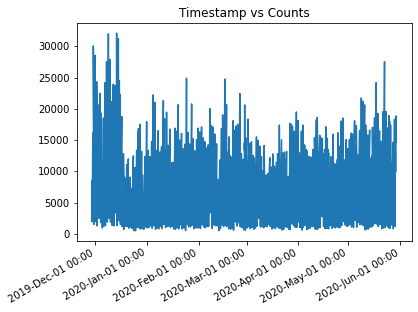

In [ ]:
ax = plt.gca()
ax.set_title("Timestamp vs Counts")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b-%d %H:%M'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
plt.plot(df2['TimeStamp'], df2['count'])

In [ ]:
df2.to_csv("./eclog_output_full.csv")